In [9]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# NLTK resources (run once)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/dataset_hospital_reviews.csv")

# Quick overview
df.head()
df.info()

# Preview some sample reviews
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Feedback         996 non-null    object 
 1   Sentiment Label  996 non-null    int64  
 2   Ratings          996 non-null    int64  
 3   Unnamed: 3       0 non-null      float64
dtypes: float64(1), int64(2), object(1)
memory usage: 31.3+ KB


,Feedback,Sentiment Label,Ratings,Unnamed: 3
0,Good and clean hospital. There is great team o...,1,5,NaN
1,Had a really bad experience during discharge. ...,1,5,NaN
2,I have visited to take my second dose and Proc...,1,4,NaN
3,That person was slightly clueless and offered...,1,3,NaN
4,There is great team of doctors and good OT fac...,0,1,NaN


In [11]:
# Drop the empty/unnecessary column
df = df.drop(columns=["Unnamed: 3"])

df.isna().sum()

,0
Feedback,0
Sentiment Label,0
Ratings,0


In [12]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

list(df.columns)

['feedback', 'sentiment_label', 'ratings']

In [13]:
# Check random examples from each sentiment class
print("Sentiment = 0 (possibly negative):")
display(df[df['sentiment_label'] == 0]['feedback'].sample(3).values)

print("\nSentiment = 1 (possibly positive):")
display(df[df['sentiment_label'] == 1]['feedback'].sample(3).values)

Sentiment = 0 (possibly negative):


array(["The staff for health checkup is worst and doesn't know how to manage people and give proper guidance. ",
       'This has been the worst experience with a hospital across India',
       'Nursing staffs are very lazy'], dtype=object)


Sentiment = 1 (possibly positive):


array(['The timing of admission and discharge for insurance patients can be provided with more clarity.',
       'I was really happy and fully satisfied with the Pre Surgery preparations/ Surgery operations & post surgery care.',
       'Bad experience at the first i went for kidney stones remove consultation doctor did not give proper answer to the issue its just money eating hospital'],
      dtype=object)

In [14]:
# Map sentiment label to descriptive text
sentiment_map = {
    0: 'Negative',
    1: 'Positive'
}

df['sentiment_desc'] = df['sentiment_label'].map(sentiment_map)

In [15]:
# cleaning function: "Feedback"
def clean_text(text):
    text = str(text).lower()  # Lowercase
    text = re.sub(r"http\S+", "", text)  # Remove URLs
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = nltk.word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return " ".join(tokens)

In [16]:
# Apply cleaning function to 'Feedback' column
df['clean_text'] = df['feedback'].apply(clean_text)

In [17]:
# Compare original vs cleaned text
df[['feedback', 'clean_text']].sample(5)

,feedback,clean_text
425,Good service by dilip kumar.,good service dilip kumar
38,We are really satisfied with the service from ...,really satisfied service fortis negative point...
545,Dr Sujith MS has been very helpful during ever...,dr sujith m helpful every visit nh hospital th...
795,Attention to patient is bit lagging zero guida...,attention patient bit lagging zero guidance co...
313,taking good care of the patient food service.,taking good care patient food service


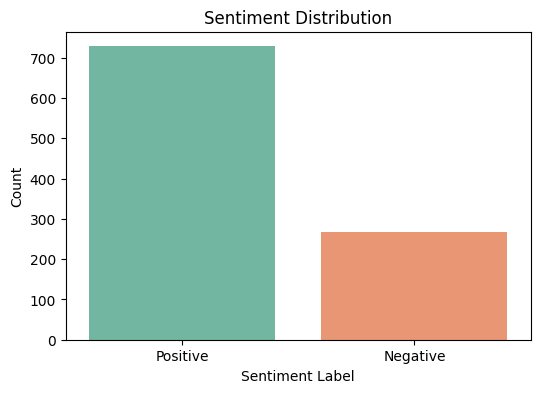

In [18]:
# Plot sentiment label distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment_desc', hue='sentiment_desc', data=df, palette='Set2', legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.show()

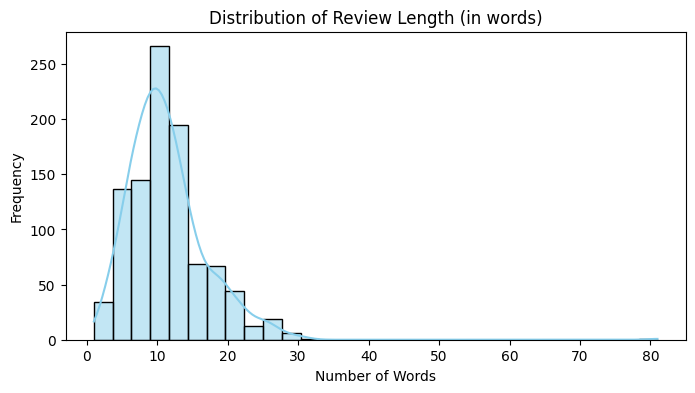

In [19]:
df['text_length'] = df['clean_text'].apply(lambda x: len(x.split()))

# Plot distribution of review lengths
plt.figure(figsize=(8, 4))
sns.histplot(df['text_length'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Review Length (in words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

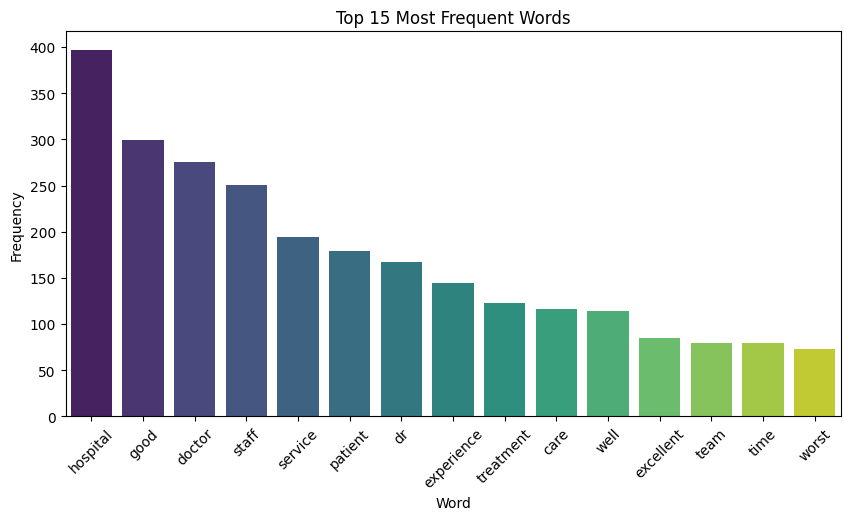

In [20]:
# Get most common words from all cleaned text
all_words = " ".join(df['clean_text']).split()
word_freq = Counter(all_words).most_common(15)

# Convert to DataFrame
freq_df = pd.DataFrame(word_freq, columns=['word', 'count'])

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=freq_df, x='word', y='count', palette='viridis', hue='word', legend=False)
plt.title("Top 15 Most Frequent Words")
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

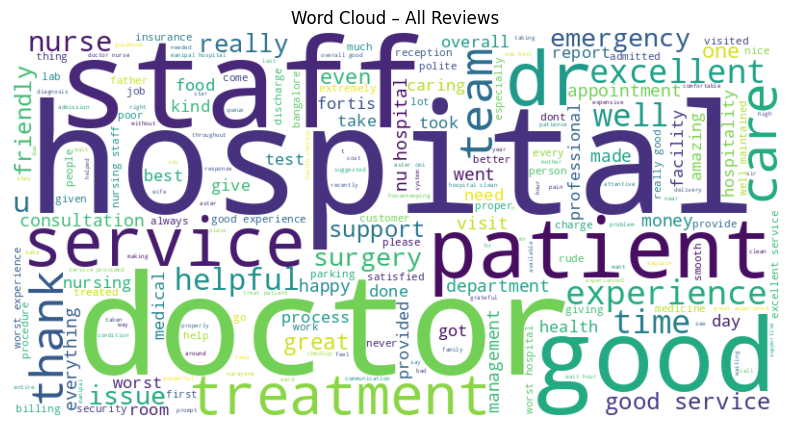

In [21]:
# All reviews

# Join all cleaned text
all_text = " ".join(df['clean_text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud – All Reviews")
plt.show()

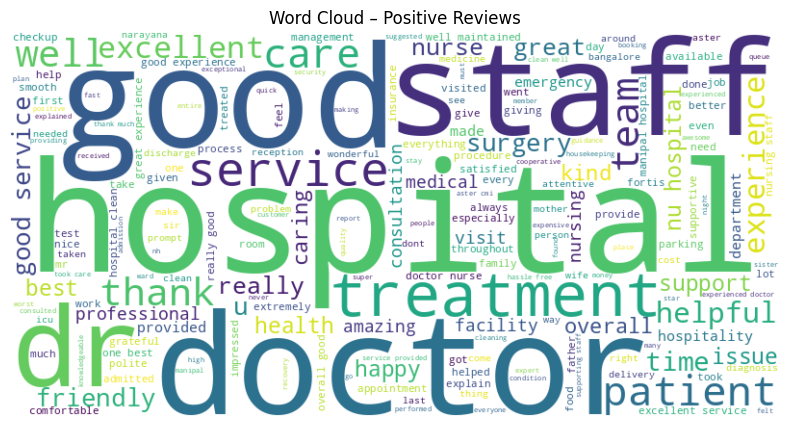

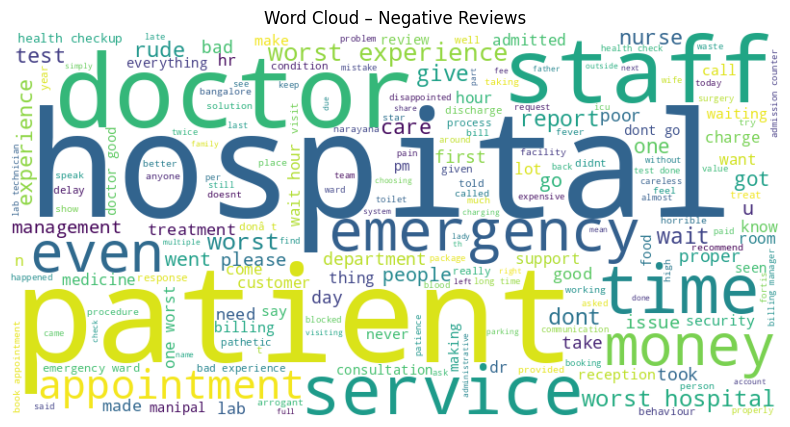

In [22]:
# reviews for each sentiment
positive_text = " ".join(df[df['sentiment_desc'] == "Positive"]['clean_text'])
negative_text = " ".join(df[df['sentiment_desc'] == "Negative"]['clean_text'])

# Word cloud – Positive
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud – Positive Reviews")
plt.show()

# Word cloud – Negative
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud – Negative Reviews")
plt.show()

In [27]:
# For Checking If New CSV File Is Saved
df = pd.read_csv("/content/drive/MyDrive/Dataset/dataset_hospital_reviews_cleaned.csv")

# Quick overview
df.head()
df.info()

# Preview some sample reviews
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   feedback         996 non-null    object
 1   sentiment_label  996 non-null    int64 
 2   ratings          996 non-null    int64 
 3   sentiment_desc   996 non-null    object
 4   clean_text       996 non-null    object
 5   text_length      996 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 46.8+ KB


,feedback,sentiment_label,ratings,sentiment_desc,clean_text,text_length
0,Good and clean hospital. There is great team o...,1,5,Positive,good clean hospital great team doctor good ot ...,28
1,Had a really bad experience during discharge. ...,1,5,Positive,really bad experience discharge need sensitive...,11
2,I have visited to take my second dose and Proc...,1,4,Positive,visited take second dose process really smooth...,19
3,That person was slightly clueless and offered...,1,3,Positive,person slightly clueless offered one package g...,15
4,There is great team of doctors and good OT fac...,0,1,Negative,great team doctor good ot facility,6
